In [55]:
# Verify installation - 
import tensorflow as tf

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [57]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [58]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [59]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.



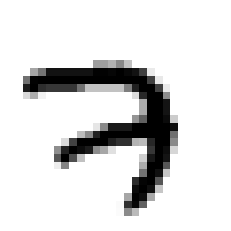

In [60]:
# lets view the first data point of X_train
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


<AxesSubplot:>

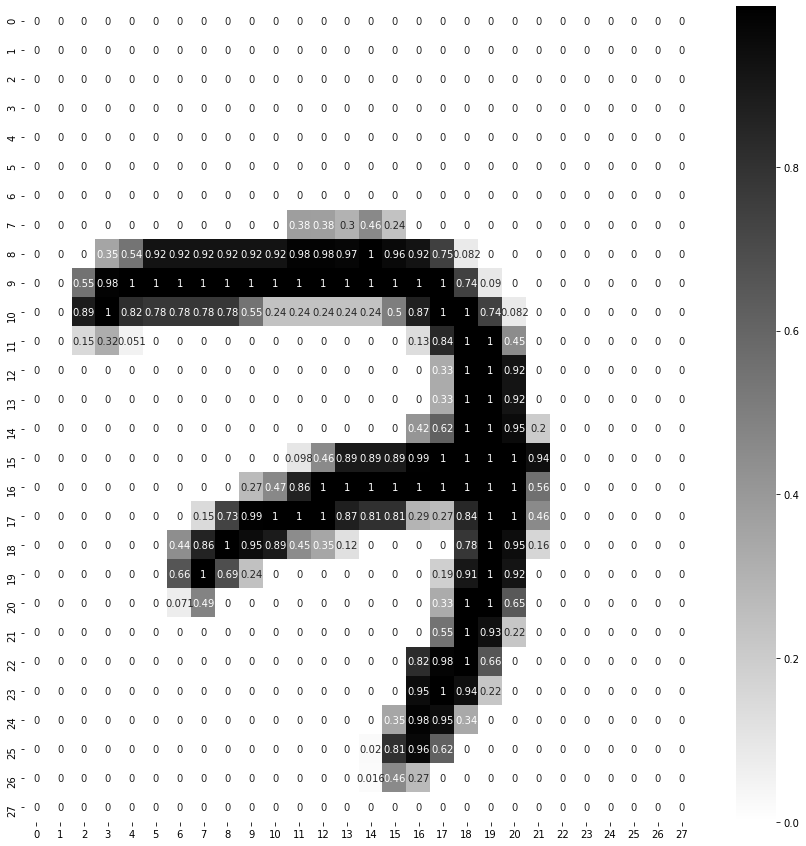

In [61]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [62]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [63]:
model_clf.layers

In [64]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [66]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [67]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [68]:
type(hidden1.get_weights())

list

In [69]:
hidden1.get_weights()

[array([[ 2.05697194e-02,  1.93099082e-02,  6.65355623e-02, ...,
          3.38484570e-02, -4.41119075e-04,  5.58039993e-02],
        [ 4.34347391e-02, -3.34978662e-02,  4.65306640e-02, ...,
          2.38460600e-02, -2.88371742e-02,  2.38386318e-02],
        [ 4.90243807e-02, -5.26137576e-02,  7.35036135e-02, ...,
          7.06197768e-02,  4.86329198e-03, -1.04975775e-02],
        ...,
        [ 3.36796045e-02, -2.01603845e-02,  9.87938046e-03, ...,
          1.52251422e-02,  5.25301099e-02,  2.35584974e-02],
        [ 3.38833258e-02,  1.06870905e-02, -6.04000017e-02, ...,
         -2.13808529e-02, -4.71323729e-05,  3.31594124e-02],
        [-1.10435560e-02,  2.17211917e-02, -4.95983586e-02, ...,
          3.84855941e-02, -2.30164975e-02,  6.24901503e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [70]:
weights, biases = hidden1.get_weights()

In [71]:
print("shape\n",weights.shape, "\n")

weights


shape
 (784, 300) 



array([[ 2.05697194e-02,  1.93099082e-02,  6.65355623e-02, ...,
         3.38484570e-02, -4.41119075e-04,  5.58039993e-02],
       [ 4.34347391e-02, -3.34978662e-02,  4.65306640e-02, ...,
         2.38460600e-02, -2.88371742e-02,  2.38386318e-02],
       [ 4.90243807e-02, -5.26137576e-02,  7.35036135e-02, ...,
         7.06197768e-02,  4.86329198e-03, -1.04975775e-02],
       ...,
       [ 3.36796045e-02, -2.01603845e-02,  9.87938046e-03, ...,
         1.52251422e-02,  5.25301099e-02,  2.35584974e-02],
       [ 3.38833258e-02,  1.06870905e-02, -6.04000017e-02, ...,
        -2.13808529e-02, -4.71323729e-05,  3.31594124e-02],
       [-1.10435560e-02,  2.17211917e-02, -4.95983586e-02, ...,
         3.84855941e-02, -2.30164975e-02,  6.24901503e-02]], dtype=float32)

In [72]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [73]:
## tenssorboard callback

In [74]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [75]:
## Early stopping call back

In [76]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [77]:
## model checkpointing callback

In [78]:
CKPT_path = "model_ckpt.h5"

checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [79]:
CALLBACKS_LIST = [tensorboard_cb, early_stopping_cb, checkpointing_cb]

In [80]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



In [81]:
EPOCHS = 30 ###<< Experiment with higher nos.
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, callbacks=CALLBACKS_LIST)


Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6012 - accuracy: 0.8439 - val_loss: 0.3121 - val_accuracy: 0.9146
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2924 - accuracy: 0.9168 - val_loss: 0.2437 - val_accuracy: 0.9326
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2396 - accuracy: 0.9317 - val_loss: 0.2093 - val_accuracy: 0.9418
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2045 - accuracy: 0.9413 - val_loss: 0.1858 - val_accuracy: 0.9484
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1780 - accuracy: 0.9490 - val_loss: 0.1655 - val_accuracy: 0.9550
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1569 - accuracy: 0.9551 - val_loss: 0.1471 - val_accuracy: 0.9592
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1401 - accuracy: 0.9606 - val_loss: 0.1373 - val_accuracy:

In [82]:
import time

def get_log_path(log_dir="logs_fit"):
  uniqueName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  log_path = os.path.join(log_dir, uniqueName)
  print(f"savings logs at: {log_path}")

  return log_path

log_dir = get_log_path()

savings logs at: logs_fit\log_2021_11_14_13_03_03


In [83]:
file_writer = tf.summary.create_file_writer(logdir=log_dir)

In [84]:
with file_writer.as_default():
  images = np.reshape(X_train[10:30], (-1, 28, 28, 1)) ### <<< 20, 28, 28, 1
  tf.summary.image("20 handritten digit samples", images, max_outputs=25, step=0)

In [98]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [99]:
%tensorboard --logdir logs_fit

Reusing TensorBoard on port 6006 (pid 3944), started 0:43:47 ago. (Use '!kill 3944' to kill it.)

In [87]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [88]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS\Model_2021_11_14_13_03_03_.h5


In [89]:
history.params


{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [90]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.601234,0.843945,0.312134,0.9146
1,0.292372,0.916836,0.243725,0.9326
2,0.239649,0.931655,0.209292,0.9418
3,0.204515,0.941345,0.185796,0.9484
4,0.177982,0.949018,0.165511,0.9550
5,0.156932,0.955127,0.147101,0.9592
6,0.140137,0.960582,0.137328,0.9622
7,0.126707,0.964400,0.126621,0.9670
8,0.114904,0.967909,0.118619,0.9688
9,0.105325,0.969800,0.114485,0.9670


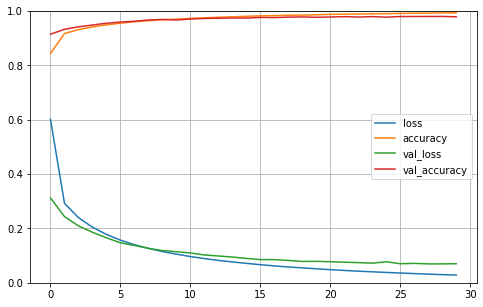

In [91]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [92]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0694 - accuracy: 0.9787


[0.06944604963064194, 0.9786999821662903]

In [93]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [94]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

In [95]:
y_test_new = y_test[:3]

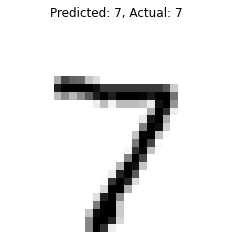

------------------------------------------------------------


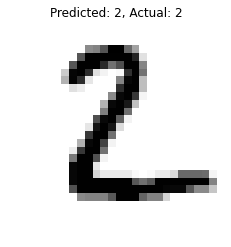

------------------------------------------------------------


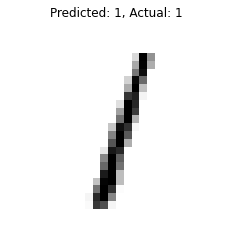

------------------------------------------------------------


In [96]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [100]:
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, callbacks=CALLBACKS_LIST)

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0302 - accuracy: 0.9930 - val_loss: 0.0700 - val_accuracy: 0.9798
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0284 - accuracy: 0.9933 - val_loss: 0.0692 - val_accuracy: 0.9800
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0269 - accuracy: 0.9939 - val_loss: 0.0683 - val_accuracy: 0.9788
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0255 - accuracy: 0.9943 - val_loss: 0.0691 - val_accuracy: 0.9804
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0242 - accuracy: 0.9949 - val_loss: 0.0680 - val_accuracy: 0.9788
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0227 - accuracy: 0.9955 - val_loss: 0.0669 - val_accuracy: 0.9804
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0214 - accuracy: 0.9959 - val_loss: 0.0678 - val_accuracy: